In [8]:
!ls data/fractal_dim/


gemma_2b_0.5_wikipedia_continue_it.jsonl
gemma_2b_1.0_wikipedia_continue_it.jsonl
mistral_7b_0.5_wikipedia_continue_it.jsonl
mistral_7b_1.0_wikipedia_continue_it.jsonl


In [13]:
import pandas as pd
import json


def read_jsonl_with_json(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line)
                data.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line.strip()}, error: {e}")
    return data

In [23]:
file_path = 'data/fractal_dim/mistral_7b_1.0_wikipedia_summary.jsonl'
jsonl_data = read_jsonl_with_json(file_path)


In [24]:
pd.DataFrame(jsonl_data)['model'].value_counts()

model
mistral_7b    700
Name: count, dtype: int64

In [26]:
df_tmp = pd.DataFrame(jsonl_data)

In [22]:
pd.DataFrame(jsonl_data)['prompt_type'].value_counts()

prompt_type
continue_it    700
Name: count, dtype: int64

In [48]:
df_tmp

,_id,dataset_name,dataset_id,model,prompt_type,temperature,llm_text,original_text,prefix,llm_text_quality,scores
0,wikip-mistral-7b-write-1.0-00013-of-00256--513,wikipedia,00013-of-00256__513,mistral_7b,summary,1.0,\nMorrison's early MMA career was characterize...,"Anthony Morrison (born March 29, 1984) is an A...",Write about the following in a minimum of 15 p...,**Good:** The document provides a detailed ana...,"{'gemma-2b': {'llm_text': {'token_ids': [108, ..."
1,wikip-mistral-7b-write-1.0-00008-of-00256--428,wikipedia,00008-of-00256__428,mistral_7b,summary,1.0,\nThe Newport Tower is a fascinating historica...,"The Newport Tower (also known as: Round Tower,...",Write about the following in a minimum of 15 p...,"The document is well-written and informative, ...","{'gemma-2b': {'llm_text': {'token_ids': [108, ..."
2,wikip-mistral-7b-write-1.0-00007-of-00256--468,wikipedia,00007-of-00256__468,mistral_7b,summary,1.0,"\nMaczek was born on August 22, 1892, in the v...",General Stanisław Maczek (; 31 March 1892 – 11...,Write about the following in a minimum of 15 p...,**Good:**\n- The document provides a detailed ...,"{'gemma-2b': {'llm_text': {'token_ids': [108, ..."
3,wikip-mistral-7b-write-1.0-00004-of-00256--408,wikipedia,00004-of-00256__408,mistral_7b,summary,1.0,\nDGC Rarities Vol. 1 was a labor of love for ...,DGC Rarities Vol. 1 is a rarities album compil...,Write about the following in a minimum of 15 p...,The document is well-written and informative. ...,"{'gemma-2b': {'llm_text': {'token_ids': [108, ..."
4,wikip-mistral-7b-write-1.0-00001-of-00256--742,wikipedia,00001-of-00256__742,mistral_7b,summary,1.0,\nKalna I CD Block is situated in the central ...,Kalna I is a community development block that ...,Write about the following in a minimum of 15 p...,**Good:**\n\n* The document provides a detaile...,"{'gemma-2b': {'llm_text': {'token_ids': [108, ..."
...,...,...,...,...,...,...,...,...,...,...,...
695,wikip-mistral-7b-write-1.0-00013-of-00256--87,wikipedia,00013-of-00256__87,mistral_7b,summary,1.0,\nThe Czech Republic's airspace is located in ...,The Czech Air Force (Czech: Vzdušné síly Armád...,Write about the following in a minimum of 15 p...,**Good:** The document provides a detailed ove...,"{'gemma-2b': {'llm_text': {'token_ids': [108, ..."
696,wikip-mistral-7b-write-1.0-00006-of-00256--271,wikipedia,00006-of-00256__271,mistral_7b,summary,1.0,\nThe National Football League (NFL) is a prof...,This is a list of current and defunct leagues ...,Write about the following in a minimum of 15 p...,The document provides an overview of various p...,"{'gemma-2b': {'llm_text': {'token_ids': [108, ..."
697,wikip-mistral-7b-write-1.0-00013-of-00256--803,wikipedia,00013-of-00256__803,mistral_7b,summary,1.0,\nAlicaforsen is a synthetic antisense oligonu...,Alicaforsen is an antisense oligonucleotide th...,Write about the following in a minimum of 15 p...,**Positive:**\n* Provides a clear explanation ...,"{'gemma-2b': {'llm_text': {'token_ids': [108, ..."
698,wikip-mistral-7b-write-1.0-00005-of-00256--424,wikipedia,00005-of-00256__424,mistral_7b,summary,1.0,"\nHowever, things take an unexpected turn when...",Pannaiyarum Padminiyum (The Landlord and Padmi...,Write about the following in a minimum of 15 p...,The document is well written and easy to under...,"{'gemma-2b': {'llm_text': {'token_ids': [108, ..."


In [32]:
df_tmp.iloc[1, :].original_text

'The Newport Tower (also known as: Round Tower, Touro Tower, Newport Stone Tower, and Old Stone Mill) is a round stone tower located in Touro Park in Newport, Rhode Island, the remains of a windmill built in the mid-17th century. It has received attention due to speculation that it is actually several centuries older and would thus represent evidence of pre-Columbian trans-oceanic contact. Carbon dating shows this belief to be incorrect.\n\nDescription \nThe Newport Tower is located in Touro Park at the top of Mill Street, surrounded by a historical residential neighborhood on the hill above the waterfront tourist district.  Eighteenth-century paintings show that the hill itself once furnished a view of the harbor and would have been visible to passing mariners in Narragansett Bay, but recent tree growth now obscures the view.\n\nThe Newport Tower is not exactly circular. From southeast to northwest, the diameter reportedly measures  but, when measured from east to west, the diameter l

In [33]:
from phd import get_phd

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
human_phd = get_phd(df_tmp.iloc[:30, :], 'original_text', n_tries=10)

100%|███████████████████████████████████████████| 30/30 [08:34<00:00, 17.14s/it]


In [43]:
llm_phd = get_phd(df_tmp.iloc[:30, :], 'llm_text', n_tries=10)

100%|███████████████████████████████████████████| 30/30 [07:46<00:00, 15.54s/it]


array([[<Axes: title={'center': '0'}>]], dtype=object)

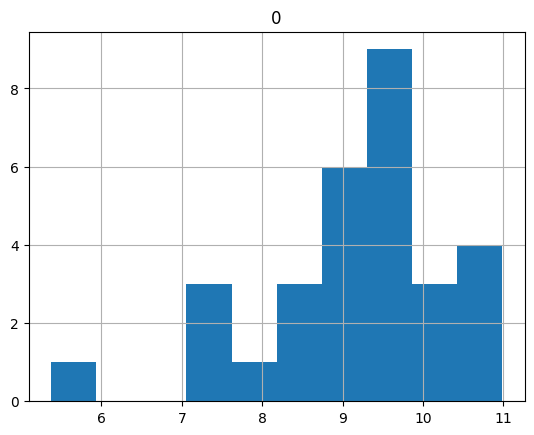

In [46]:
pd.DataFrame(human_phd).hist(bins=10)

array([[<Axes: title={'center': '0'}>]], dtype=object)

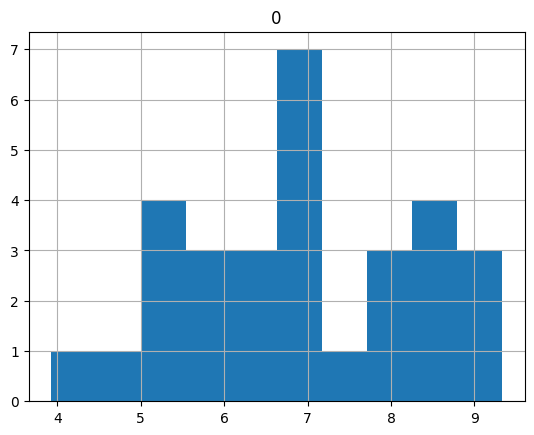

In [47]:
pd.DataFrame(llm_phd).hist(bins=10)

In [49]:
human_phd.mean()

9.161567362648785

In [50]:
llm_phd.mean()

6.8945133976112665